# <span style="color:#F72585"><center>Clasificación, Softmax, Iris</center></span>

<center>Clasificación con múltiples categorías</center>

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Redes_Neuronales/Imagenes/iris.jpg" width="600" height="400" align="center" /> 
</center>   
</figure>
<center>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_4.jpg">No machine-readable author provided. Dlanglois assumed (based on copyright claims).</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

</center>

## <span style="color:#4361EE">Introducción</span>

Esta lección está dedicada a un modelo  de clasificación con múltiples categorías, que corresponde a la generalización natural del modelo logístico. 

* Practicaremos la codificación *one-hot* para los datos de salida.
* También usaremos la API funcional de tf.keras, que es una forma de programación maś flexible y poderosa que el modelo Sequential
* Usaremos las funciones *relu* para capas intermedias y entrada y la función de activación *softmax* para la salida, debido a que se tienen varias clases. 

## <span style="color:#4361EE">Importa módulos</span>

Usaremos las bibliotecas
* *seaborn* para gráficas un poco más elegantes
* *sklearn* para utilidades de estandarización de datos y matriz de confusión

Puede usar las siguientes instrucciones para instalar desde la consola.

In [1]:
# !conda install -c anaconda seaborn
# !conda install -c intel scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
#
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
#from sklearn import KFold
print("Versión de Tensorflow:", tf.__version__)

c:\Users\User\anaconda3\envs\work\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Versión de Tensorflow: 2.9.1


## <span style="color:#4361EE">Funciones de activación</span> 

### <span style="color:#4CC9F0">Relu</span>


Dada la salida del sumador digamos $y=\mathbf{w}'\mathbf{x} +b$, la función de activación *relu* esta definida por

$$
\text{relu}(y) = \begin{cases} &0, \text{ si } y\le 0,\\
 &y, \text{ en otro caso } \end{cases}
$$



### <span style="color:#4CC9F0">Softmax</span>



Dados los valores $x_1,\ldots, x_n$ la función *softmax *  es definida por

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$$

Es decir, *softmax* transforma los valores en un función de probabilidad.

## <span style="color:#4361EE">El conjunto de datos Iris</span> 


Este conjunto de datos fue introducido por sir [Ronald Fisher](https://es.wikipedia.org/wiki/Ronald_Fisher)

## <span style="color:#4361EE">Lectura de datos y primera vista de los datos</span>


Bajamos los datos de Internet usando *tf.keras.utils* y luego los cargamos en dataframes de Python.

In [3]:
# nombres de las columnas de los datos
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
target_dimensions = ['Setosa', 'Versicolor', 'Virginica']

# lee los datos
training_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

training = pd.read_csv(training_data_path, names=col_names, header=0)
test = pd.read_csv(test_data_path, names=col_names, header=0)

test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


## <span style="color:#4361EE">Pre-procesamiento</span> 

La variable objetivo (target) tiene tres categorías. Usaremos la codificación one-hot para transformar las codificaciones en vectores binarios.

### <span style="color:#4CC9F0">Codificación one-hot</span>


In [4]:
y_train= pd.DataFrame(to_categorical(training.Species))
y_train.columns = target_dimensions

y_test = pd.DataFrame(to_categorical(test.Species))
y_test.columns = target_dimensions

In [5]:
y_test

,Setosa,Versicolor,Virginica
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


### <span style="color:#4CC9F0">Elimina la columna Species del dataframe</span>


In [6]:
y_train_species = training.pop('Species')
#test.drop(['Species'], axis=1, inplace=True)
y_test_species = test.pop('Species') # extrae la columna y la coloca en y_test_species
#
#Si necesita subir al dataframe la recodificación use estas líneas
#training = training.join(y_train )
#test = test.join(y_test)

### <span style="color:#4CC9F0">Normaliza los features</span>

#### <span style="color:#4CC9F0">StandardScaler</span>


In [7]:
# crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta los parámetros del scaler
scaler.fit(training)
print (scaler.mean_)

# escala training y test
x_train = scaler.transform(training)
x_test = scaler.transform(test)

# labels ( no requieren escalación)


[5.845      3.065      3.73916667 1.19666667]


## <span style="color:#4361EE">Crea el modelo usando la API funcional</span> 

La API funcional de Keras es bastante más flexible y poderosa que el modelo Sequential

In [8]:
# Con la API funcion se requiere la capa Input que transforma la entrada 
# en un tensor de tensorflow directamente
#
inputs = Input(shape=(4,),name='capa_entrada')
#
# vamos construyendo capa por capa
x = Activation('relu')(inputs)
x = Dense(8, activation='relu',name='primera_capa_oculta')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu', name='segunda_capa_oculta')(x)
x = Dropout(0.2)(x)
outputs = Dense(3, activation='softmax', name='capa_salida')(x)

# Creamos ahora el modelo
model_iris = Model(inputs=inputs, outputs=outputs)

model_iris.summary()
plot_model(model_iris, to_file='../Imagenes/iris_model.png', 
           show_shapes=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_entrada (InputLayer)   [(None, 4)]               0         
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 primera_capa_oculta (Dense)  (None, 8)                40        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 segunda_capa_oculta (Dense)  (None, 16)               144       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 capa_salida (Dense)         (None, 3)                 51    

## <span style="color:#4361EE">Compila</span> 

In [9]:
model_iris.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## <span style="color:#4361EE">Entrena</span> 

In [10]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('.', end='')

epochs = 200


In [11]:
history = model_iris.fit(x_train, y_train,
                    batch_size= 16,
                    epochs= epochs,
                    validation_split=0.1, verbose=0,
                    callbacks=[PrintDot()])     
print('\nHecho')
print('Resultados finales de pérdida y exactitud\n')
# presenta la última parte de la historia
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

........................................................................................................................................................................................................
Hecho
Resultados finales de pérdida y exactitud



,loss,accuracy,val_loss,val_accuracy,epoch
195,0.266229,0.851852,0.330470,0.916667,195
196,0.328597,0.833333,0.327249,0.916667,196
197,0.308528,0.851852,0.326494,0.916667,197
198,0.223665,0.898148,0.326085,0.916667,198
199,0.226568,0.861111,0.325492,0.916667,199


## <span style="color:#4361EE">Evaluación del modelo</span> 

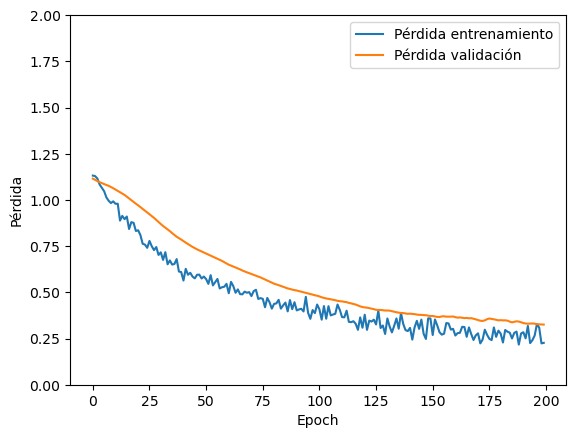

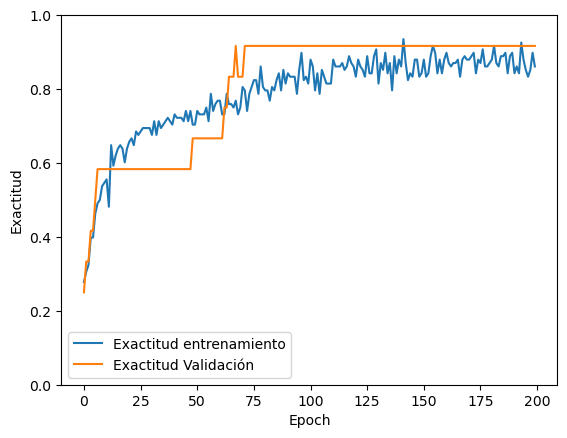

In [12]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Pérdida')
  plt.plot(hist['epoch'], hist['loss'],
           label='Pérdida entrenamiento')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Pérdida validación')
  plt.ylim([0,2])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Exactitud')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Exactitud entrenamiento')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Exactitud Validación')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

## <span style="color:#4361EE">Predicciones</span> 

In [13]:
# Predicting the Test set results
y_pred = model_iris.predict(x_test)
y_pred_c = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 140ms/step


## <span style="color:#4361EE">Matriz de confusión</span> 

In [14]:
cm = confusion_matrix(y_test_species, y_pred_c)

In [15]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1]+ cm[2][2])/y_test_species.shape[0])*100))

Our accuracy is 93.33333333333333%


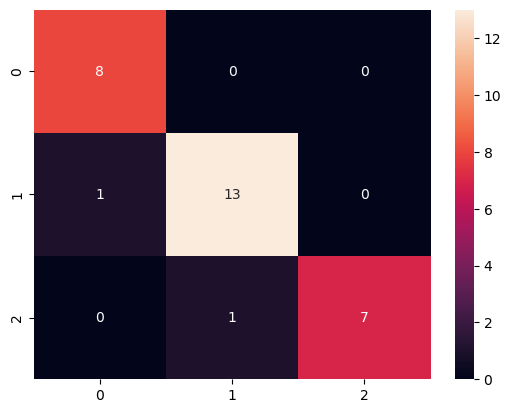

In [16]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

## <span style="color:#4361EE">Exploración interna de la red</span> 

### <span style="color:#4CC9F0">Cálculo de la salida de los datos de entrenamiento</span>


In [17]:
inputs = x_train
outputs = model_iris(inputs)
outputs.numpy().round(2)[:10]

array([[0.  , 0.06, 0.94],
       [0.57, 0.43, 0.  ],
       [0.01, 0.52, 0.47],
       [0.76, 0.24, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.97, 0.03, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.06, 0.94],
       [0.  , 0.96, 0.04],
       [1.  , 0.  , 0.  ]], dtype=float32)

### <span style="color:#4CC9F0">Extrae la segunda capa oculta para estos datos</span>


In [18]:
# modelo Sequential
#layer_2 = tf.keras.models.Model(
#    inputs=model_iris.inputs,
#    outputs=model_iris.get_layer(name='segunda_capa_oculta').output,
#)

In [19]:
# API funcional
# 1. crea un nuevo modelo
# 2. Compila
# 3. Predice

inputs = x_train
model = Model(model_iris.input, model_iris.get_layer(name='segunda_capa_oculta').output)
model.compile()
output = model.predict(inputs)

4/4 [==============================] - 0s 2ms/step


In [20]:
output.shape

(120, 16)

### <span style="color:#4CC9F0">Crea tabla de datos para hacer un gráfico tsne</span>


In [21]:
plot_data = np.hstack([output, np.array(y_train_species).reshape(y_train_species.shape[0],1)])
plot_data = pd.DataFrame(plot_data)

In [22]:
plot_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.214596,0.0,0.014735,0.000000,2.588060,0.000000,2.057467,0.769469,2.121261,0.940094,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
1,0.000000,0.0,1.103630,0.205203,0.210532,1.087753,0.345696,0.000000,0.361466,0.000000,1.338738,0.351171,0.606223,0.572500,0.095572,0.0,1.0
2,0.304049,0.0,0.139149,0.000000,0.994960,0.154550,0.916814,0.053859,0.937073,0.472700,0.201298,0.000000,0.073183,0.000000,0.000000,0.0,2.0
3,0.000000,0.0,1.252842,0.310630,0.154850,1.256678,0.222499,0.000000,0.248797,0.000000,1.510357,0.496300,0.732735,0.714571,0.059207,0.0,0.0
4,0.000000,0.0,4.171165,2.216268,0.000000,4.557969,0.000000,0.000000,0.000000,0.000000,4.863779,3.190290,3.213732,3.544414,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.000000,0.0,0.781466,0.000000,0.721364,0.693218,0.696781,0.000000,0.743031,0.000000,1.004633,0.000000,0.420361,0.288629,0.049087,0.0,1.0
116,0.000000,0.0,0.841117,0.000000,0.562605,0.751772,0.615212,0.000000,0.647601,0.000000,1.071287,0.056251,0.434131,0.321796,0.106638,0.0,1.0
117,0.000000,0.0,1.103630,0.205203,0.210532,1.087753,0.345696,0.000000,0.361466,0.000000,1.338738,0.351171,0.606223,0.572500,0.095572,0.0,0.0
118,0.000000,0.0,1.103630,0.205203,0.210532,1.087753,0.345696,0.000000,0.361466,0.000000,1.338738,0.351171,0.606223,0.572500,0.095572,0.0,0.0


### <span style="color:#4CC9F0">Crea gráfico tsne</span>


In [23]:
from sklearn.manifold import TSNE

# reduce dimensionalidad con t-sne
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(output)

c:\Users\User\anaconda3\envs\work\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 119 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.001s...
[t-SNE] Computed neighbors for 120 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 1.969876
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.993931
[t-SNE] KL divergence after 1000 iterations: 0.014936


In [24]:
labels = [target_dimensions[i] for i in y_train_species]
#['Setosa', 'Versicolor', 'Virginica']

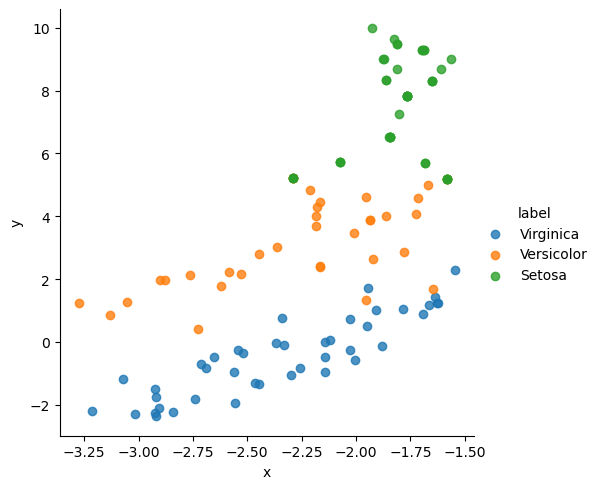

In [25]:
# visualiza con seaborn
df_tsne = pd.DataFrame(tsne_results, columns=['x', 'y'])
df_tsne['label'] = labels
sns.lmplot(x='x', y='y', data=df_tsne, hue='label', fit_reg=False)

### <span style="color:#4CC9F0">Ejercicio</span>


1. Reescriba y reentren la red en Pytorch.
1. Investigue como extraer la capa oculta en Pytorch
1. Haga un gráfico TSNE para los datos originales
1. Haga una reducción ACP y haga el correspondiente gráfico

¿Cuáles son sus conclusiones?